## Preprocessing

In [1]:
# Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ooo fancy deep learning
import tensorflow as tf

In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("charity_data.csv")
backup_df = pd.read_csv("charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
df.drop(columns=['EIN', 'NAME'], inplace=True)

In [7]:
# Determine the number of unique values in each column.
df.nunique ()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17', 'T10']
# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successfu
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
df['CLASSIFICATION'].value_counts()[df.CLASSIFICATION.value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = [row["index"] for indx, row in df.CLASSIFICATION.value_counts().reset_index().iterrows() if row.CLASSIFICATION < 1500]



# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
df = pd.get_dummies(df)
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = df.drop('IS_SUCCESSFUL', axis=1).values
y = df.loc[:, ['IS_SUCCESSFUL']].values.ravel()
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.75 : 0.25


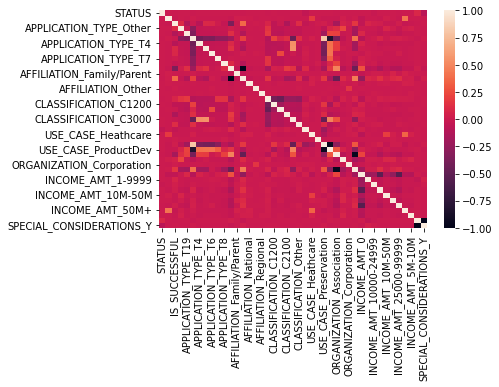

In [29]:
corrs = df.corr()
sns.heatmap(corrs)
plt.show()

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [31]:
# same recipe as class examples
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 8148  3880]
 [ 3181 10515]]

                  precision    recall  f1-score   support

           0       0.72      0.68      0.70     12028
           1       0.73      0.77      0.75     13696

    accuracy                           0.73     25724
   macro avg       0.72      0.72      0.72     25724
weighted avg       0.73      0.73      0.72     25724

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2670 1340]
 [1066 3499]]

                  precision    recall  f1-score   support

           0       0.71      0.67      0.69      4010
           1       0.72      0.77      0.74      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

    

AUC for the Model Test Set: 0.7570800272047156


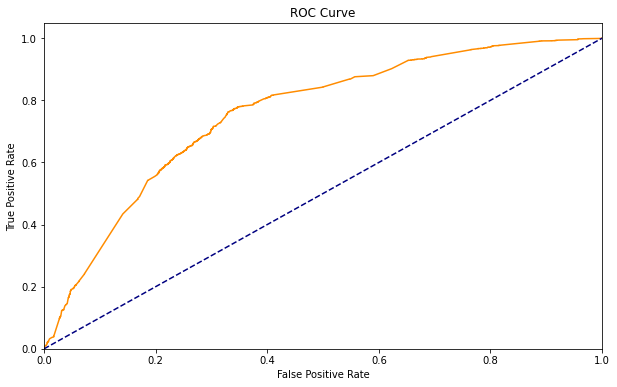

Brier Score:
1693.8427954999988


In [32]:
#Linear Regression to set a baseline
lr = LogisticRegression(max_iter=10000)
evaluateModel(lr, X_train_scaled, X_test_scaled, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 8460  3568]
 [ 2621 11075]]

                  precision    recall  f1-score   support

           0       0.76      0.70      0.73     12028
           1       0.76      0.81      0.78     13696

    accuracy                           0.76     25724
   macro avg       0.76      0.76      0.76     25724
weighted avg       0.76      0.76      0.76     25724

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2649 1361]
 [1024 3541]]

                  precision    recall  f1-score   support

           0       0.72      0.66      0.69      4010
           1       0.72      0.78      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

    

AUC for the Model Test Set: 0.7796669061191492


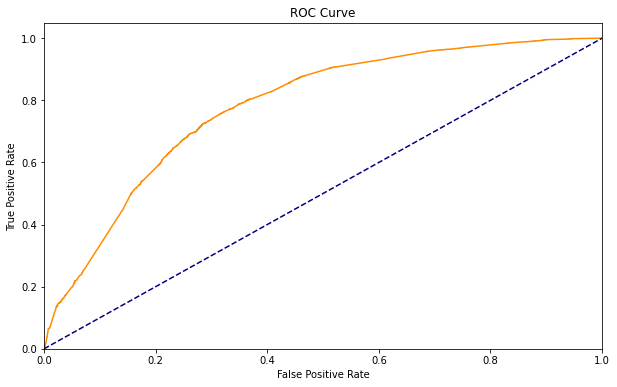

Brier Score:
1611.6422014274353


In [33]:
#xgBoost
xgb = XGBClassifier(random_state=42)

evaluateModel(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

Neural Network

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 344       
                                                                 
 dense_11 (Dense)            (None, 5)                 45        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 395
Trainable params: 395
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
804/804 [==============================] - 2s 2ms/step - loss: 0.6173 - accuracy: 0.6805
Epoch 2/25
804/804 [==============================] - 2s 3ms/step - loss: 0.5709 - accuracy: 0.7223
Epoch 3/25
804/804 [==============================] - 2s 3ms/step - loss: 0.5630 - accuracy: 0.7254
Epoch 4/25
804/804 [==============================] - 2s 3ms/step - loss: 0.5589 - accuracy: 0.7270
Epoch 5/25
804/804 [==============================] - 2s 3ms/step - loss: 0.5567 - accuracy: 0.7282
Epoch 6/25
804/804 [==============================] - 2s 3ms/step - loss: 0.5551 - accuracy: 0.7282
Epoch 7/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7292
Epoch 8/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5529 - accuracy: 0.7290
Epoch 9/25
804/804 [==============================] - 2s 3ms/step - loss: 0.5521 - accuracy: 0.7298
Epoch 10/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7314

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5581 - accuracy: 0.7195 - 485ms/epoch - 2ms/step
Loss: 0.5581299662590027, Accuracy: 0.7195335030555725


268/268 [==============================] - 0s 1ms/step

  METRICS FOR THE TESTING SET:
  ----------------------------
  [[2486 1524]
 [ 881 3684]]

                precision    recall  f1-score   support

           0       0.74      0.62      0.67      4010
           1       0.71      0.81      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.71      0.71      8575
weighted avg       0.72      0.72      0.72      8575

  

AUC for the Model Test Set: 0.7800340332083263


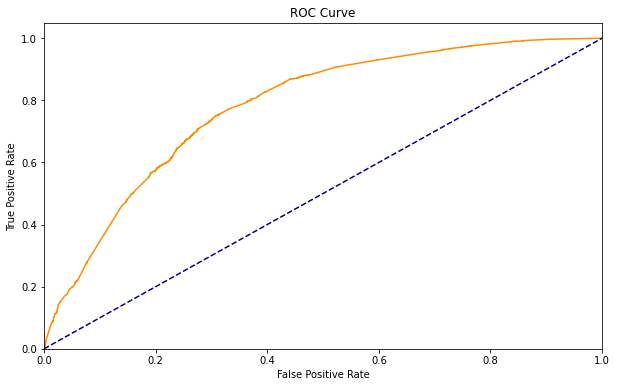

In [45]:
test_proba = [x[0] for x in nn.predict(X_test_scaled)]
test_preds = [round(x) for x in test_proba]

output_test = f"""
  METRICS FOR THE TESTING SET:
  ----------------------------
  {confusion_matrix(y_test, test_preds)}

  {classification_report(y_test, test_preds)}
  """
print(output_test)
print()

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 3
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 9)                 387       
                                                                 
 dense_14 (Dense)            (None, 6)                 60        
                                                                 
 dense_15 (Dense)            (None, 3)                 21        
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
804/804 [==============================] - 3s 2ms/step - loss: 0.6457 - accuracy: 0.6712
Epoch 2/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5811 - accur

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5576 - accuracy: 0.7223 - 737ms/epoch - 3ms/step
Loss: 0.5575805902481079, Accuracy: 0.7223323583602905


268/268 [==============================] - 0s 1ms/step

  METRICS FOR THE TESTING SET:
  ----------------------------
  [[2690 1320]
 [1061 3504]]

                precision    recall  f1-score   support

           0       0.72      0.67      0.69      4010
           1       0.73      0.77      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

  

AUC for the Model Test Set: 0.7794073687631962


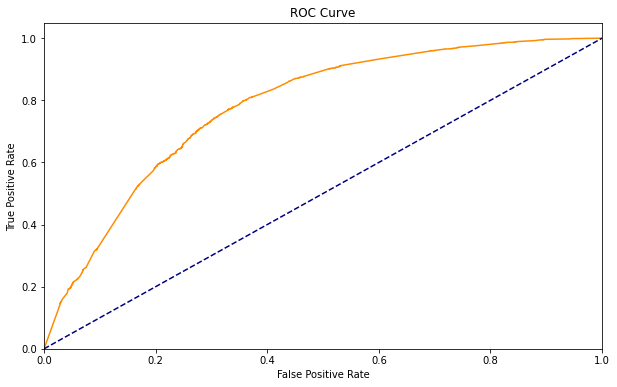

In [48]:
test_proba = [x[0] for x in nn.predict(X_test_scaled)]
test_preds = [round(x) for x in test_proba]

output_test = f"""
  METRICS FOR THE TESTING SET:
  ----------------------------
  {confusion_matrix(y_test, test_preds)}

  {classification_report(y_test, test_preds)}
  """
print(output_test)
print()

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="leaky_relu")
)
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 8)                 344       
                                                                 
 dense_18 (Dense)            (None, 5)                 45        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 395
Trainable params: 395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
804/804 [==============================] - 2s 2ms/step - loss: 0.6044 - accuracy: 0.7057
Epoch 2/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5657 - accuracy: 0.7278
Epoch 3/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.7301
Epoch 4/25
804/804 [

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5573 - accuracy: 0.7234 - 707ms/epoch - 3ms/step
Loss: 0.5572679042816162, Accuracy: 0.7233819365501404


268/268 [==============================] - 1s 2ms/step

  METRICS FOR THE TESTING SET:
  ----------------------------
  [[2613 1397]
 [ 975 3590]]

                precision    recall  f1-score   support

           0       0.73      0.65      0.69      4010
           1       0.72      0.79      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

  

AUC for the Model Test Set: 0.7817739058705918


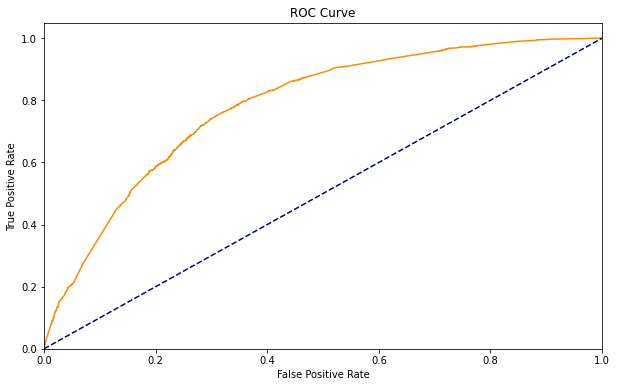

In [51]:
test_proba = [x[0] for x in nn.predict(X_test_scaled)]
test_preds = [round(x) for x in test_proba]

output_test = f"""
  METRICS FOR THE TESTING SET:
  ----------------------------
  {confusion_matrix(y_test, test_preds)}

  {classification_report(y_test, test_preds)}
  """
print(output_test)
print()

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# NN1. 8575/8575 - 0s - loss: 0.5578 - acc: 0.7263
# Loss: 0.557812534073699, Accuracy: 0.7262973785400391

# NN2. 268/268 - 1s - loss: 0.5556 - accuracy: 0.7247 - 562ms/epoch - 2ms/step
#Loss: 0.5555658340454102, Accuracy: 0.7246647477149963

# NN3. 268/268 - 2s - loss: 0.5565 - accuracy: 0.7237 - 2s/epoch - 6ms/step
#Loss: 0.5564838647842407, Accuracy: 0.7237317562103271

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
